Challenge - Business Analytics Intern (mfd) - Health Tech

1 - How much revenue can be expected in 2023

2 - How many unique patients will have been acquired by the end of 2023

Important: 
Take into account that will be launched one clinic in March 2023, and another one in July 2023. The 2 already existing clinics will keep running in 2023. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Specify the path to your CSV file
appointments_file_path = 'p21_bi_intern_test_appointments (1).csv'
revenues_file_path = 'p21_bi_intern_test_revenues.csv'

# Read the CSV file into a DataFrame
df_appointments = pd.read_csv(appointments_file_path)
df_revenues = pd.read_csv(revenues_file_path)

# Display the DataFrame appointments first rows
df_appointments.head()








,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14


In [ ]:
# Display the DataFrame revenues first rows
df_revenues.head()

,appointment_id,revenues
0,68339e8c-c708-4042-ba21-263838e0487b,NaN
1,270bd629-028b-45b2-86a1-af8de97a7fd0,54.17
2,85c0b7cf-6e50-4683-88c4-9d6ea30f6500,20.67
3,4333637e-b13a-41b8-a0b6-d43ce4c7c761,35.69
4,e526a6ac-eaf4-47bd-bead-1332fe3444e4,150.77


In [ ]:
# Perform an inner join based on the 'appointment_id' column
merged_df = pd.merge(df_appointments, df_revenues, on='appointment_id', how='inner')


In [ ]:
# Display the merged df first rows
merged_df.head()

,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date,revenues
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22,299.17
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02,124.51
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18,85.31
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06,116.40
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14,299.70


In [ ]:
# Dataset total of rows and columns
merged_df.shape

(11015, 6)

In [ ]:
# Check columns info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appointment_id    11015 non-null  object 
 1   practitioner_id   11015 non-null  object 
 2   patient_id        11015 non-null  int64  
 3   clinic_id         11015 non-null  int64  
 4   appointment_date  11015 non-null  object 
 5   revenues          10902 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 516.5+ KB


In [ ]:
# Convert the 'appointment_date' to datetime
merged_df['appointment_date'] = pd.to_datetime(merged_df['appointment_date'], format='%Y-%m-%d')

In [ ]:
# Check columns info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    11015 non-null  object        
 1   practitioner_id   11015 non-null  object        
 2   patient_id        11015 non-null  int64         
 3   clinic_id         11015 non-null  int64         
 4   appointment_date  11015 non-null  datetime64[ns]
 5   revenues          10902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 516.5+ KB


In [ ]:
# Check dataset statistics
merged_df.describe()

,patient_id,clinic_id,appointment_date,revenues
count,11015.000000,11015.000000,11015,10902.000000
mean,75955.592828,1.515842,2022-07-20 14:32:37.694053632,174.671997
min,18069.000000,1.000000,2022-01-01 00:00:00,0.800000
25%,41707.000000,1.000000,2022-04-21 00:00:00,32.890000
50%,68319.000000,2.000000,2022-08-01 00:00:00,76.900000
75%,113273.000000,2.000000,2022-10-24 00:00:00,179.320000
max,160196.000000,2.000000,2022-12-31 00:00:00,15082.980000
std,41118.267892,0.499772,NaN,440.630226


In [ ]:
# Check if there is null values in all columns
merged_df.isnull().sum()

appointment_id        0
practitioner_id       0
patient_id            0
clinic_id             0
appointment_date      0
revenues            113
dtype: int64

In [ ]:
# Create a new column for the year
merged_df['year'] = merged_df['appointment_date'].dt.year

# Create a new column for the month
merged_df['month'] = merged_df['appointment_date'].dt.month

# Create a new column for the day
merged_df['day'] = merged_df['appointment_date'].dt.day

In [ ]:
# Check merged dataset first rows with new columns year and month
merged_df.head()

,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date,revenues,year,month,day
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22,299.17,2022,12,22
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02,124.51,2022,6,2
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18,85.31,2022,10,18
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06,116.40,2022,1,6
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14,299.70,2022,10,14


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    11015 non-null  object        
 1   practitioner_id   11015 non-null  object        
 2   patient_id        11015 non-null  int64         
 3   clinic_id         11015 non-null  int64         
 4   appointment_date  11015 non-null  datetime64[ns]
 5   revenues          10902 non-null  float64       
 6   year              11015 non-null  int32         
 7   month             11015 non-null  int32         
 8   day               11015 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(2)
memory usage: 645.5+ KB


In [ ]:
# Existing clinics revenue in 2022
existing_clinics_2022_revenue = round(merged_df['revenues'].sum(), 2)
existing_clinics_2022_revenue

1904274.11

In [ ]:
# Existing clinics revenue per month in 2022
existing_clinics_monthly_revenue = merged_df.groupby('month')['revenues'].sum().reset_index()
existing_clinics_monthly_revenue

,month,revenues
0,1,98149.780
1,2,125227.635
2,3,151705.875
3,4,146936.540
4,5,144192.080
5,6,160837.670
6,7,181325.570
7,8,137464.565
8,9,184714.875
9,10,181327.730


<Axes: xlabel='month', ylabel='revenues'>

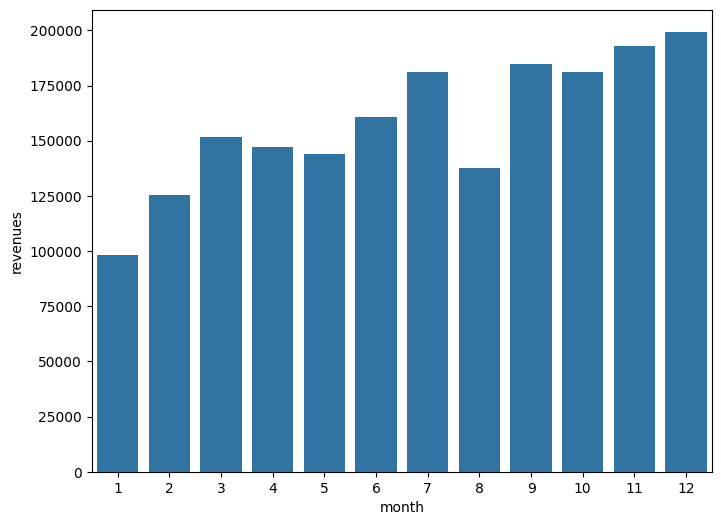

In [ ]:
# Existing clinics revenue per month in 2022
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'month',
            y= 'revenues',
            data= existing_clinics_monthly_revenue)

The above graph shows the months with the highest revenues are December and November, on the other hand the lowest are January and February.

In [ ]:
# Existing clinics revenue per day in 2022
existing_clinics_dayly_revenue = merged_df.groupby('day')['revenues'].sum().reset_index()
existing_clinics_dayly_revenue

,day,revenues
0,1,61150.280
1,2,62564.105
2,3,50087.715
3,4,52740.260
4,5,44784.340
5,6,46950.300
6,7,67268.540
7,8,59237.525
8,9,63139.260
9,10,79151.940


<Axes: xlabel='day', ylabel='revenues'>

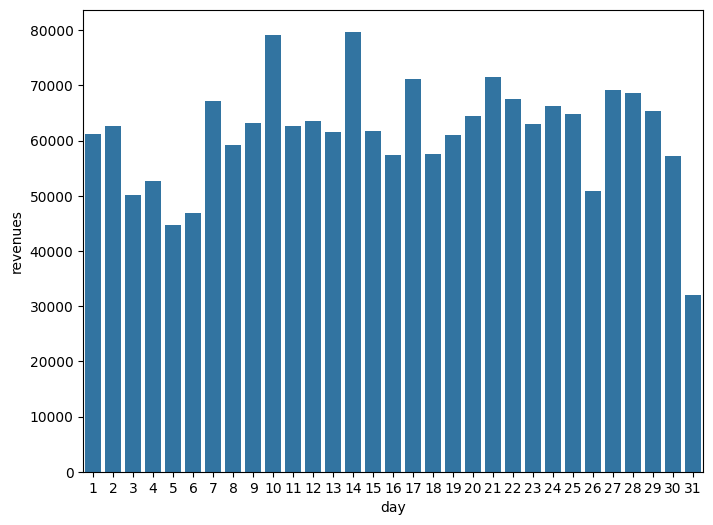

In [ ]:
# Existing clinics revenue per day in 2022
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'day',
            y= 'revenues',
            data= existing_clinics_dayly_revenue)

The graph above shows that the days with the highest revenues are the 14th and 10th, while the lowest are the 31th, 5th and 6th.

In [ ]:
# Average of appointment's revenues per year
year_groups = merged_df.groupby(['year'])
df_year_groups = year_groups['revenues'].agg(['count', 'mean'])
df_year_groups.reset_index('year', inplace=True)
df_year_groups

,year,count,mean
0,2022,10902,174.671997


In [ ]:
# Average of appointment's revenues per month
month_groups = merged_df.groupby(['month'])
df_month_groups = month_groups['revenues'].agg(['mean'])
df_month_groups.reset_index('month', inplace=True)
df_month_groups

,month,mean
0,1,138.434104
1,2,165.426202
2,3,202.544559
3,4,180.511720
4,5,176.273936
5,6,227.171850
6,7,208.900426
7,8,157.102360
8,9,175.584482
9,10,158.780849


<Axes: xlabel='month', ylabel='mean'>

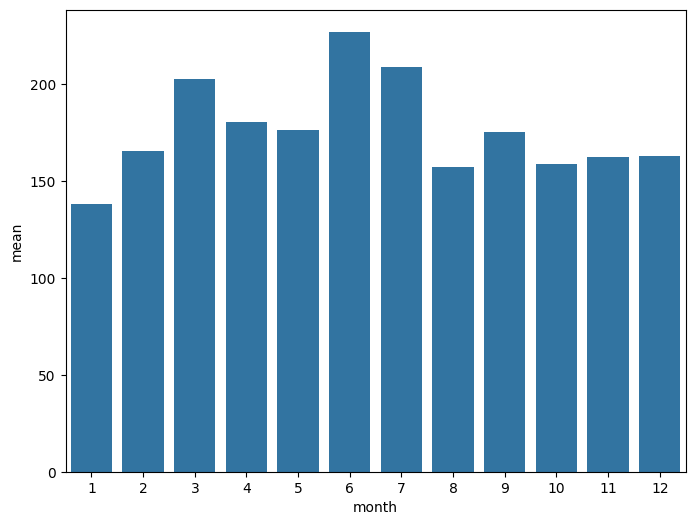

In [ ]:
# Average of appointment's revenues per month
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'month',
            y= 'mean',
            data= df_month_groups)

The above graph shows the month with the highest revenue average is June, while the lowest is January.

In [ ]:
# Average of appointment's revenues per day
day_groups = merged_df.groupby(['day'])
df_day_groups = day_groups['revenues'].agg(['mean'])
df_day_groups.reset_index('day', inplace=True)
df_day_groups

,day,mean
0,1,189.907702
1,2,196.742469
2,3,165.305990
3,4,161.285199
4,5,147.316908
5,6,150.000958
6,7,158.278918
7,8,156.299538
8,9,193.086422
9,10,191.651186


<Axes: xlabel='day', ylabel='mean'>

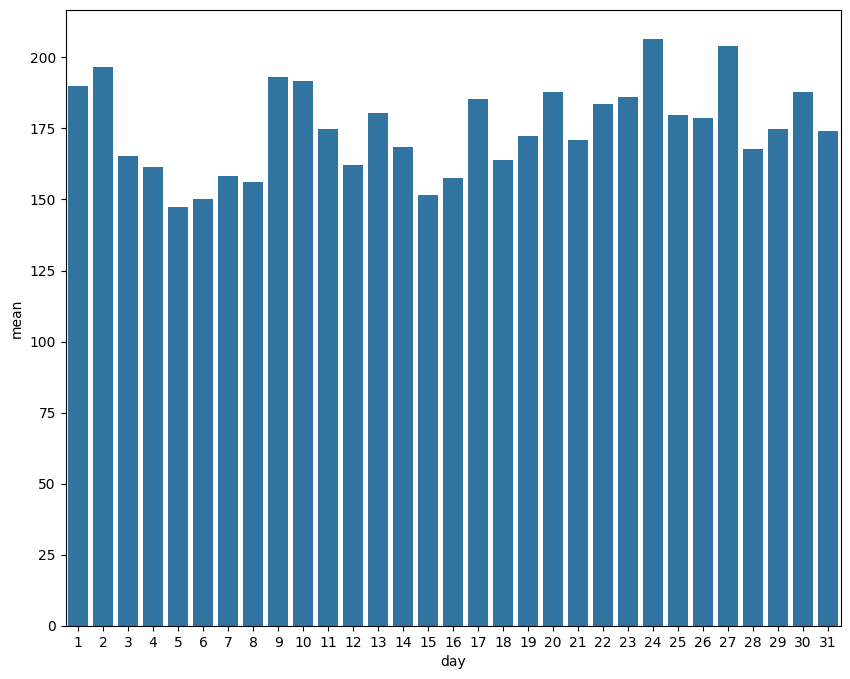

In [ ]:
# Average of appointment's revenues per day
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'day',
            y= 'mean',
            data= df_day_groups)

The days with the highest revenue average are the 24th and the 27th, while the lowest are the 5th and 6th.

In [ ]:
# Count of appointments  per month
month_groups = merged_df.groupby(['month'])
df_month_groups = month_groups['revenues'].agg(['count'])
df_month_groups.reset_index('month', inplace=True)
df_month_groups

,month,count
0,1,709
1,2,757
2,3,749
3,4,814
4,5,818
5,6,708
6,7,868
7,8,875
8,9,1052
9,10,1142


<Axes: xlabel='month', ylabel='count'>

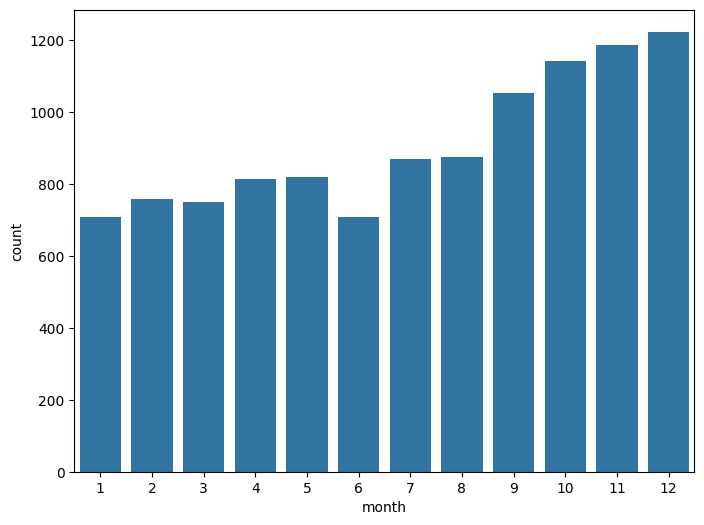

In [ ]:
# Count of appointments  per month
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'month',
            y= 'count',
            data= df_month_groups)

The months with the most appointments are December and November, while the months with the least appointments are June and January.

In [ ]:
# Count of appointments  per day
day_groups = merged_df.groupby(['day'])
df_day_groups = day_groups['appointment_id'].agg(['count'])
df_day_groups.reset_index('day', inplace=True)
df_day_groups

,day,count
0,1,325
1,2,325
2,3,303
3,4,327
4,5,310
5,6,313
6,7,429
7,8,382
8,9,333
9,10,414


<Axes: xlabel='day', ylabel='count'>

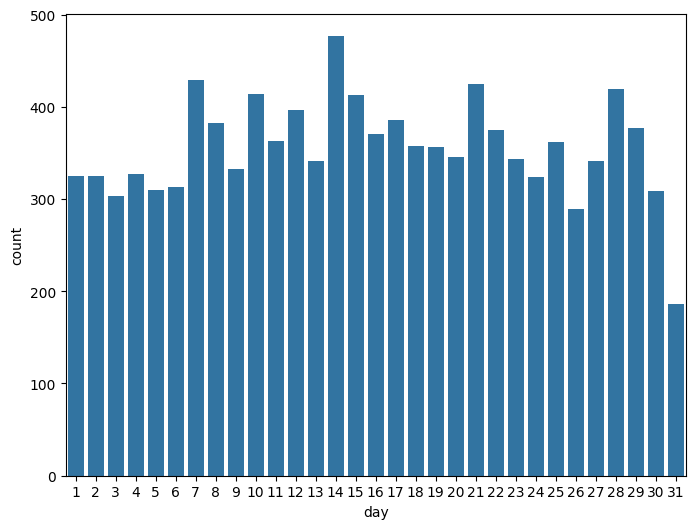

In [ ]:
# Count of appointments  per day
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'day',
            y= 'count',
            data= df_day_groups)

The above graph shows that the month with the most appointments is the 14th, while the days with the least appointments are the 31st, 26th and the 3rd. 

In [ ]:
# Revenue per existing clinics
existing_clinics_revenue = merged_df.groupby('clinic_id')['revenues'].sum().reset_index()
existing_clinics_revenue

,clinic_id,revenues
0,1,920110.26
1,2,984163.85


<Axes: xlabel='clinic_id', ylabel='revenues'>

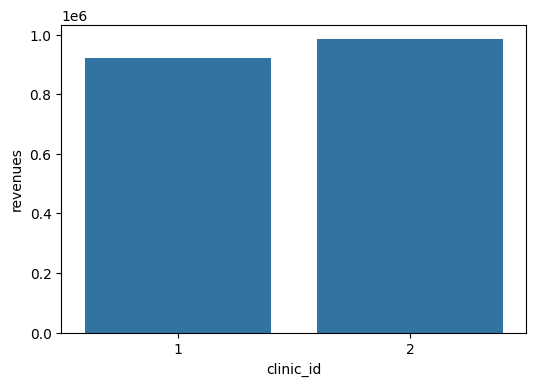

In [ ]:
# Revenue per existing clinics
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'clinic_id',
            y= 'revenues',
            data= existing_clinics_revenue)

In [ ]:
# Clinic 1 revenue
clinic1_revenue = merged_df.loc[(merged_df['clinic_id'] == 1)].groupby('clinic_id')['revenues'].sum()
clinic1_revenue

clinic_id
1    920110.26
Name: revenues, dtype: float64

In [ ]:
# Clinic 1 monthly revenue
clinic1_monthly_revenue = round(merged_df.loc[(merged_df['clinic_id'] == 1)].groupby('month')['revenues'].sum().reset_index(), 2)
clinic1_monthly_revenue


,month,revenues
0,1,49252.01
1,2,67169.45
2,3,90365.66
3,4,87678.27
4,5,63757.20
5,6,53689.00
6,7,79371.47
7,8,79411.48
8,9,80940.52
9,10,86047.62


In [ ]:
# Clinic 2 revenue
clinic2_revenue = merged_df.loc[(merged_df['clinic_id'] == 2)].groupby('clinic_id')['revenues'].sum()
clinic2_revenue

clinic_id
2    984163.85
Name: revenues, dtype: float64

In [ ]:
# Clinic 2 monthly revenue
clinic2_monthly_revenue = round(merged_df.loc[(merged_df['clinic_id'] == 2)].groupby('month')['revenues'].sum().reset_index(), 2)
clinic2_monthly_revenue

,month,revenues
0,1,48897.77
1,2,58058.18
2,3,61340.22
3,4,59258.27
4,5,80434.88
5,6,107148.67
6,7,101954.10
7,8,58053.08
8,9,103774.35
9,10,95280.11


In [ ]:
# Create a new dataframe to store the clinics revenue and average by month
new_df = pd.DataFrame({
    'Month': clinic1_monthly_revenue['month'], 
    'Revenue Clinic 1': clinic1_monthly_revenue['revenues'],
    'Revenue Clinic 2': clinic2_monthly_revenue['revenues'],
    'Average Clinics Revenue':  round((clinic1_monthly_revenue['revenues'] + clinic2_monthly_revenue['revenues']) / 2, 2)
})

display(new_df)

,Month,Revenue Clinic 1,Revenue Clinic 2,Average Clinics Revenue
0,1,49252.01,48897.77,49074.89
1,2,67169.45,58058.18,62613.82
2,3,90365.66,61340.22,75852.94
3,4,87678.27,59258.27,73468.27
4,5,63757.20,80434.88,72096.04
5,6,53689.00,107148.67,80418.83
6,7,79371.47,101954.10,90662.78
7,8,79411.48,58053.08,68732.28
8,9,80940.52,103774.35,92357.44
9,10,86047.62,95280.11,90663.86


<Axes: xlabel='Month', ylabel='Average Clinics Revenue'>

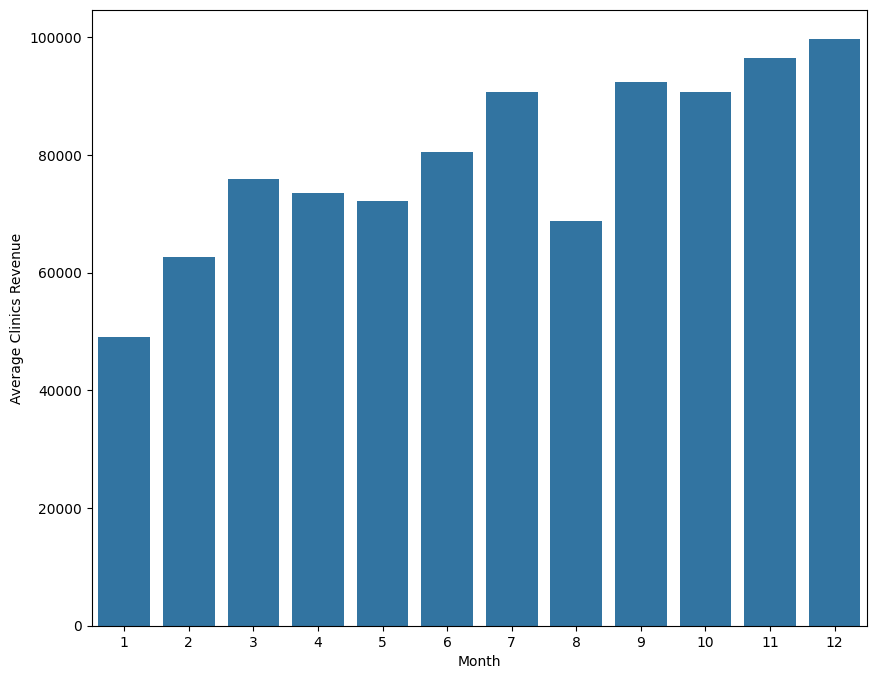

In [ ]:
# Clinics average revenue by month
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x= 'Month',
            y= 'Average Clinics Revenue',
            data= new_df)

The above graph shows the months with the highest revenues average between the two existing clinics are December and November, on the other hand the lowest are January and February.

In [ ]:
# New clinic '3' revenue expectation (opens in March 2023)
new_clinic3_revenue_expectation = new_df.loc[(new_df['Month'] >= 3)]['Average Clinics Revenue'].sum()
display(new_clinic3_revenue_expectation)

840448.34

In [ ]:
# New clinic '3' monthly revenue expectation (opens in March 2023)
new_clinic3_monthly_revenue_expectation = new_df.loc[(new_df['Month'] >= 3)][['Month','Average Clinics Revenue']]
new_clinic3_monthly_revenue_expectation

,Month,Average Clinics Revenue
2,3,75852.94
3,4,73468.27
4,5,72096.04
5,6,80418.83
6,7,90662.78
7,8,68732.28
8,9,92357.44
9,10,90663.86
10,11,96501.41
11,12,99694.49


In [ ]:
# New clinic '4' revenue expectation (opens in July 2023)
new_clinic4_revenue_expectation = new_df.loc[(new_df['Month'] >= 7)]['Average Clinics Revenue'].sum()
display(new_clinic4_revenue_expectation)

538612.26

In [ ]:
# New clinic '4' monthly revenue expectation (opens in July 2023)
new_clinic4_monthly_revenue_expectation = new_df.loc[(new_df['Month'] >= 7)][['Month','Average Clinics Revenue']]
new_clinic4_monthly_revenue_expectation

,Month,Average Clinics Revenue
6,7,90662.78
7,8,68732.28
8,9,92357.44
9,10,90663.86
10,11,96501.41
11,12,99694.49


In [ ]:
# 2023 revenue expectation
revenue_expectation_2023 = existing_clinics_2022_revenue + new_clinic3_revenue_expectation + new_clinic4_revenue_expectation
revenue_expectation_2023

3283334.71

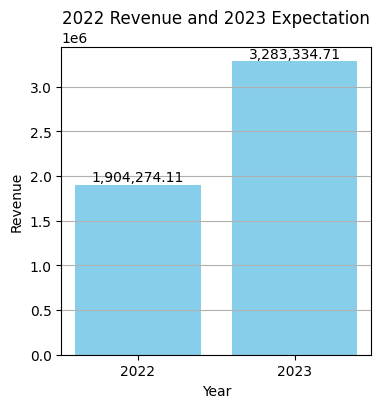

In [ ]:
# Data
year = [2022, 2023]
revenue = [existing_clinics_2022_revenue, revenue_expectation_2023]

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(year, revenue, color='skyblue')
plt.title('2022 Revenue and 2023 Expectation')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(year)
plt.grid(axis='y')
# Adding data labels on top of the bars
# Adding data labels on top of the bars
for bar, value in zip(bars, revenue):
    formatted_value = "{:,.2f}".format(value)  # Separating thousands and formatting to two decimal places
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             ha='center', va='bottom', color='black', fontsize=10)
plt.show()


Considering that the existing clinics will perform the same way they did in 2022,
and that the new clinics will perform as well as the average between the existing clinics,
it can be expected the revenue of 3283334.71 in 2023.

In [ ]:
# Increase of revenue between 2023 and 2022
revenue_increase_expectation = round(revenue_expectation_2023 - existing_clinics_2022_revenue, 2)
revenue_increase_expectation

1379060.6

In [ ]:
# % Increase of revenue between 2023 and 2022
revenue_increase_expectation_percent = (round(revenue_increase_expectation / existing_clinics_2022_revenue, 2)) * 100
revenue_increase_expectation_percent

72.0

In [ ]:
# Create a new dataframe to store the clinics revenue and average by month
df_revenue_diff = pd.DataFrame({
    '2022 Revenue': existing_clinics_2022_revenue, 
    '2023 Revenue Expectation': revenue_expectation_2023,
    'Revenue Increase Expectation $': revenue_increase_expectation,
    'Revenue Increase Expectation %':  revenue_increase_expectation_percent
}, index=[0])

display(df_revenue_diff)

,2022 Revenue,2023 Revenue Expectation,Revenue Increase Expectation $,Revenue Increase Expectation %
0,1904274.11,3283334.71,1379060.6,72.0


It can be exepected to have an increase of 72% of revenues in 2023.

In [ ]:
# Existing clinics appointments per patient
existing_clinics_patients_appointments = merged_df['patient_id'].value_counts()
existing_clinics_patients_appointments

patient_id
36274     24
40415     23
36180     22
91070     21
44313     21
          ..
152352     1
135722     1
149203     1
22978      1
67361      1
Name: count, Length: 3977, dtype: int64

In [ ]:
# Sum and Count of appointment's revenues per patient
patient_groups = merged_df.groupby(['patient_id'])
df_patient_groups = patient_groups['revenues'].agg(['count', 'sum', 'mean'])
df_patient_groups.reset_index('patient_id', inplace=True)
df_patient_groups.sort_values(by='sum', ascending=False)

,patient_id,count,sum,mean
1942,77798,19,17628.64,927.823158
720,42912,12,16884.43,1407.035833
716,42873,18,16264.09,903.560556
953,47306,12,15672.46,1306.038333
805,44498,9,15647.50,1738.611111
...,...,...,...,...
192,23519,1,10.34,10.340000
146,22002,1,10.33,10.330000
105,20535,1,10.33,10.330000
175,23042,1,10.33,10.330000


In [ ]:
# Average and Count of appointment's revenues per patient
patient_groups = merged_df.groupby(['patient_id'])
df_patient_groups = patient_groups['revenues'].agg(['count','sum', 'mean'])
df_patient_groups.reset_index('patient_id', inplace=True)
df_patient_groups.sort_values(by='mean', ascending=False)

,patient_id,count,sum,mean
2473,94518,8,14214.66,1776.832500
805,44498,9,15647.50,1738.611111
996,48387,3,4463.24,1487.746667
191,23505,10,14469.32,1446.932000
720,42912,12,16884.43,1407.035833
...,...,...,...,...
192,23519,1,10.34,10.340000
146,22002,1,10.33,10.330000
175,23042,1,10.33,10.330000
105,20535,1,10.33,10.330000


The patient with more appointments in 2022 was the id number 36274 with 24 appearances. On the other hand the one who brought the highest revenue was the id number 77798, while the patient id number 94518 was the one with the highest revenue average.

In [ ]:
# Existing clinics unique patients
existing_clinics_unique_patients = merged_df['patient_id'].nunique()
existing_clinics_unique_patients

3977

In [ ]:
# Existing clinics unique patients per clinic
existing_clinics_unique_patients_per_clinic = merged_df.groupby('clinic_id')['patient_id'].nunique()
existing_clinics_unique_patients_per_clinic

clinic_id
1    1605
2    2372
Name: patient_id, dtype: int64

In [ ]:
# Clinic 1 unique patients
clinic1_unique_patients = merged_df.loc[(merged_df['clinic_id'] == 1)]['patient_id'].nunique()
clinic1_unique_patients

1605

In [ ]:
# Clinic 2 unique patients
clinic2_unique_patients = merged_df.loc[(merged_df['clinic_id'] == 2)]['patient_id'].nunique()
clinic2_unique_patients

2372

In [ ]:
# Average between existing clinics unique patients
avg_unique_patients = (clinic1_unique_patients + clinic2_unique_patients) / 2
avg_unique_patients

1988.5

In [ ]:
# Clinic 3 unique patients expectation
clinic3_qty_working_months = 10 # opens in March, so it has 10 working months in 2023. 
clinic3_unique_patients_expec = round((avg_unique_patients / 12) * clinic3_qty_working_months)
clinic3_unique_patients_expec

1657

In [ ]:
# Clinic 4 unique patients expectation
clinic4_qty_working_months = 6 # opens in July, so it has 6 working months in 2023.
clinic4_unique_patients_expec = round((avg_unique_patients / 12) * clinic4_qty_working_months)
clinic4_unique_patients_expec

994

In [ ]:
# 2023 unique patients expectation
unique_patients_expectation_2023 = existing_clinics_unique_patients + clinic3_unique_patients_expec + clinic4_unique_patients_expec
unique_patients_expectation_2023

6628

In [ ]:
# Increase of unique patients between 2022 and 2023
unique_patients_increase_expectation = round(unique_patients_expectation_2023 - existing_clinics_unique_patients, 2)
unique_patients_increase_expectation

2651

In [ ]:
# % Increase of unique patients between 2022 and 2023
unique_patients_increase_expectation_percent = (round(unique_patients_increase_expectation / existing_clinics_unique_patients, 2)) * 100
unique_patients_increase_expectation_percent

67.0

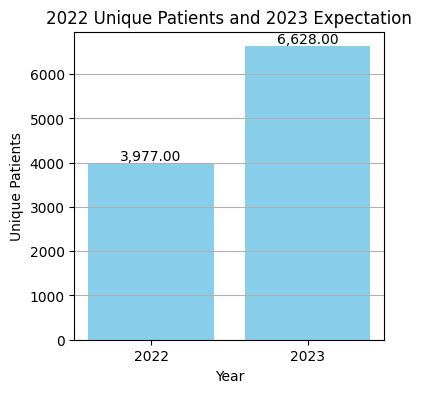

In [ ]:
# Data
year = [2022, 2023]
unique_patients = [existing_clinics_unique_patients, unique_patients_expectation_2023]

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.bar(year, unique_patients, color='skyblue')
plt.title('2022 Unique Patients and 2023 Expectation')
plt.xlabel('Year')
plt.ylabel('Unique Patients')
plt.xticks(year)
plt.grid(axis='y')
# Adding data labels on top of the bars
# Adding data labels on top of the bars
for bar, value in zip(bars, unique_patients):
    formatted_value = "{:,.2f}".format(value)  # Separating thousands and formatting to two decimal places
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             ha='center', va='bottom', color='black', fontsize=10)
plt.show()

Considering that the existing clinics will perform the same way they did in 2022,
and that the new clinics will perform as the average between the existing clinics,
it can be expected to be acquired the total of 6628 unique patients by the end of 2023.